In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [50]:
df = pd.read_csv('datasets/train.csv', index_col='PassengerId')    
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [52]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [53]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: ylabel='PassengerId'>

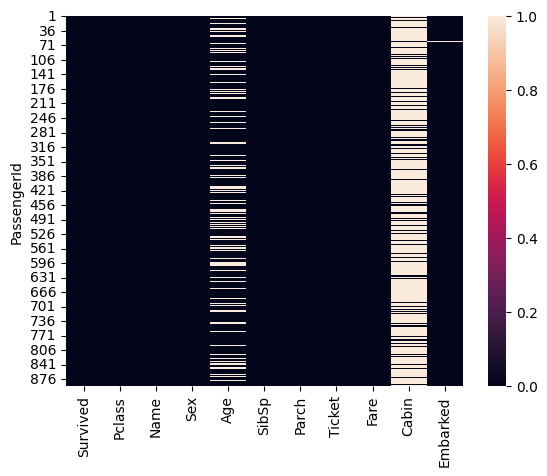

In [54]:
sns.heatmap(df.isna())  

### Find the null vals as a percentage for each column and drop the columns with more than 50% null values

In [55]:
df.isna().sum() * 100 / len(df)

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [56]:
# dropping Cabin col
df.drop('Cabin', axis=1, inplace=True)
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


### Handle missing values

In [57]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [58]:
# fill missing values in Embarked with mode ( Embarked is a categorical feature so we use mode)
mode_embarked = df["Embarked"].mode()[0]
df["Embarked"].fillna(mode_embarked, inplace=True)  
df["Embarked"].isna().sum()

C:\Users\Chamika Jayasinghe\AppData\Local\Temp\ipykernel_23784\1998292013.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(mode_embarked, inplace=True)


0

### Fill the missing values of Age with the median value of Age

In [59]:
median_age = df["Age"].median() 
df["Age"].fillna(median_age, inplace=True)
df["Age"].isna().sum()

C:\Users\Chamika Jayasinghe\AppData\Local\Temp\ipykernel_23784\658348713.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(median_age, inplace=True)


0

### Categorical data encoding

In [60]:
df.tail(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [61]:
# encode sex
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [62]:
df["Sex"] = df["Sex"].map({"male":1, "female":0}) 


In [63]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
125,0,1,"White, Mr. Percival Wayland",1,54.0,0,1,35281,77.2875,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",0,49.0,1,0,PC 17572,76.7292,C
834,0,3,"Augustsson, Mr. Albert",1,23.0,0,0,347468,7.8542,S
201,0,3,"Vande Walle, Mr. Nestor Cyriel",1,28.0,0,0,345770,9.5000,S
198,0,3,"Olsen, Mr. Karl Siegwart Andreas",1,42.0,0,1,4579,8.4042,S


### Encode Embarked 
#### embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [64]:
df["Embarked"].unique() 

array(['S', 'C', 'Q'], dtype=object)

### use dummy encoding for "embarked" column

In [65]:
encoded_df  = pd.get_dummies(df, columns=["Embarked"], drop_first=True, dtype=int)  # drop first is used to avoid dummy variable trap

In [66]:
encoded_df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,1
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1
6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,1,0
7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,0,1


### How Many People Survived And How Many Died?


In [67]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0, 0.5, 'Count')

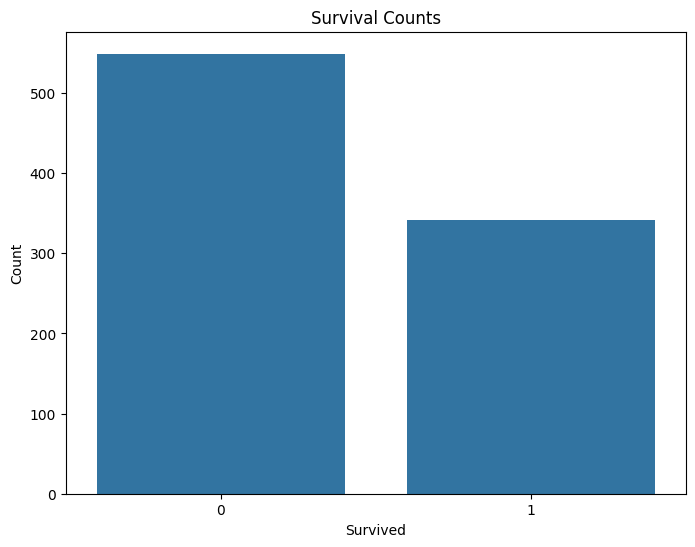

In [68]:
plt.figure(figsize=(8, 6))

sns.countplot(x="Survived", data=df)

plt.title("Survival Counts")
plt.xlabel("Survived")
plt.ylabel("Count")


### How Many Passengers Were In First Class, Second Class, and Third Class?


Text(0, 0.5, 'Count')

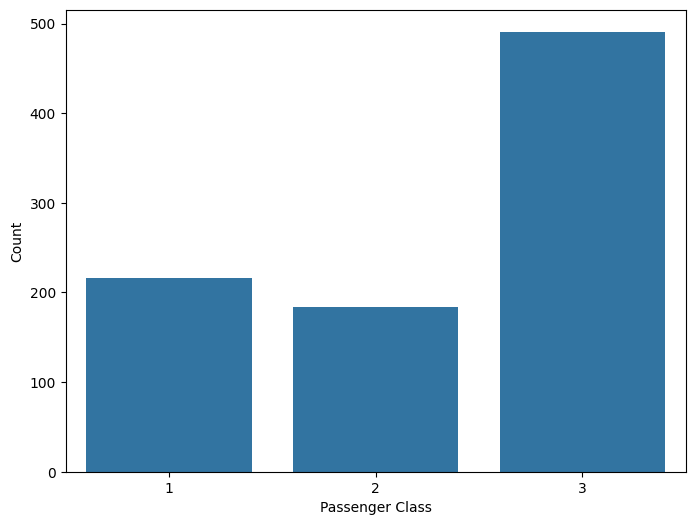

In [69]:
plt.figure(figsize=(8, 6))

sns.countplot(x="Pclass", data=df)


plt.xlabel("Passenger Class")
plt.ylabel("Count")


In [70]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### Num of male and females

In [71]:
df["Sex"].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

Text(0, 0.5, 'Count')

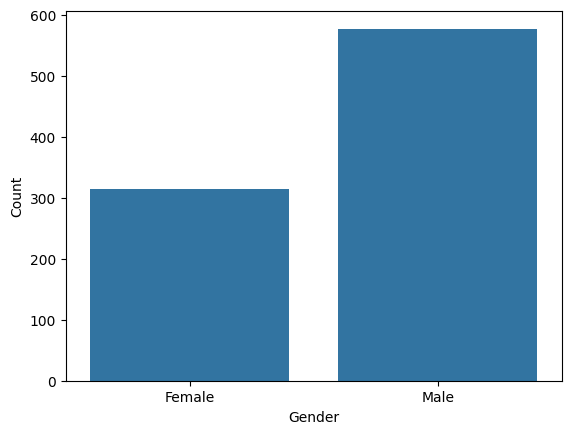

In [72]:
sns.countplot(x="Sex", data=df, )

plt.xticks([0, 1], ['Female', 'Male'])

plt.xlabel("Gender")
plt.ylabel("Count")


### How are the passengers distributed by age? ( use histograms and boxplots for continuous data 😊) 

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

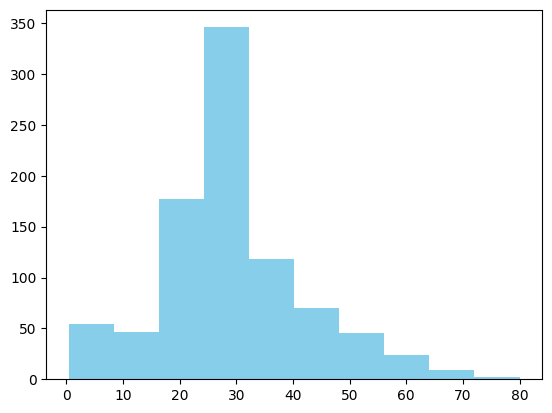

In [73]:
plt.hist(df["Age"], color="skyblue")

<Axes: ylabel='Age'>

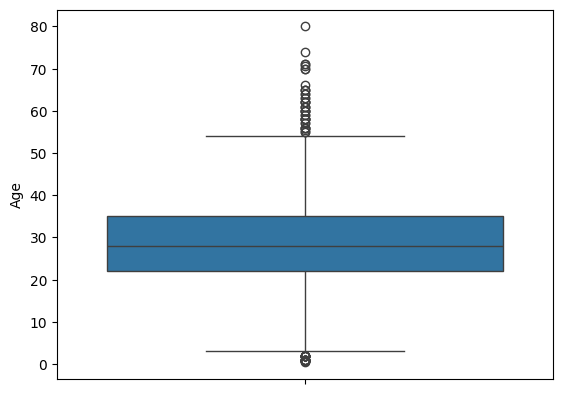

In [74]:
sns.boxplot(df["Age"])

### Who has better chance of survival ? ( male or female)

In [75]:
survived_counts = df.groupby(['Sex', 'Survived']).size().reset_index(name="Count")
survived_counts

,Sex,Survived,Count
0,0,0,81
1,0,1,233
2,1,0,468
3,1,1,109


([<matplotlib.axis.XTick at 0x1d73d4b7b30>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

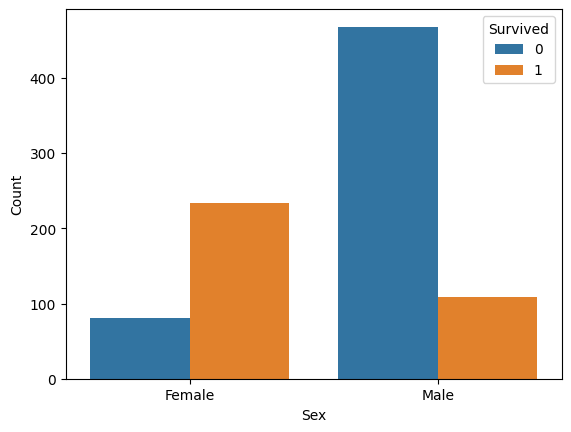

In [76]:
sns.barplot(x="Sex", y="Count", hue="Survived", data=survived_counts)
plt.xticks([0,1], ["Female", "Male"])

### Who has better chance of survival depending on passanger class ?    

In [77]:
x = df.groupby(["Pclass", "Survived"]).size().reset_index(name="Count")
x

,Pclass,Survived,Count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


([<matplotlib.axis.XTick at 0x1d73d90dca0>,
 [Text(0, 0, '1st'), Text(1, 0, '2nd'), Text(2, 0, '3rd')])

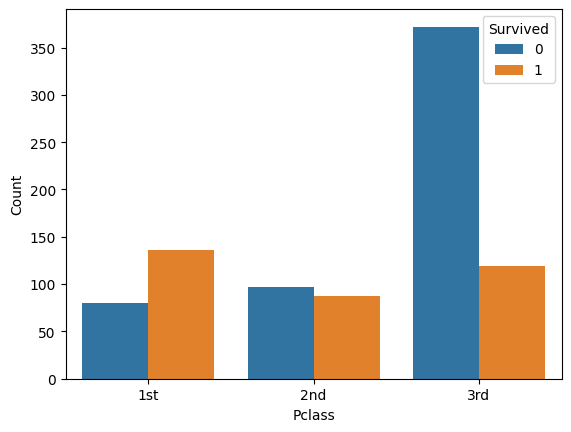

In [78]:
sns.barplot(x="Pclass", y="Count", hue="Survived", data=x)
plt.xticks([0,1,2], ["1st", "2nd", "3rd"])  